In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [3]:
# Load the dataset
df = pd.read_csv("D:\Personal loan acceptance project\Copy of loan.csv")

# Display first few rows
df.head()


<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Admin\AppData\Local\Temp\ipykernel_3912\2137597905.py:2: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv("D:\Personal loan acceptance project\Copy of loan.csv")


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


**Data cleaning**

In [5]:
# Drop Loan_ID as it’s not useful for prediction
df.drop('Loan_ID', axis=1, inplace=True)

# Fill missing values
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

# Check again
print(df.isnull().sum())


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_3912\1792553166.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_3912\1792553166.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



**Exploratory Data Analysis**

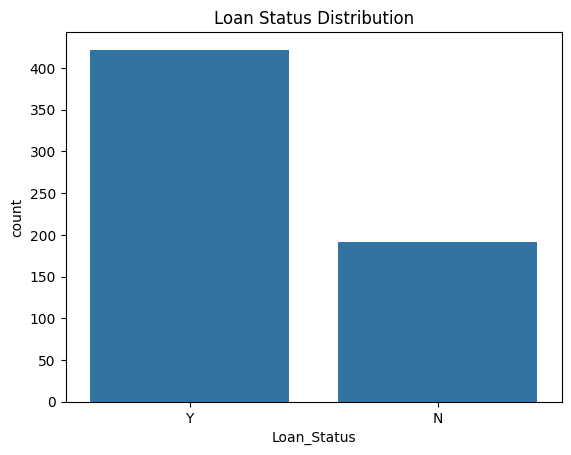

In [6]:
# Visualize loan status
sns.countplot(data=df, x='Loan_Status')
plt.title("Loan Status Distribution")
plt.show()

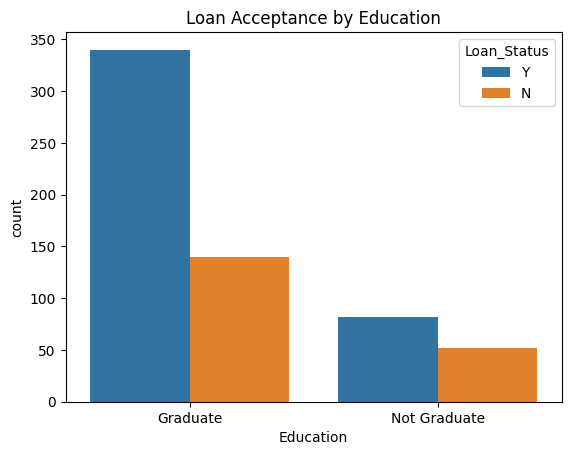

In [7]:
# Check acceptance rate by Education
sns.countplot(data=df, x='Education', hue='Loan_Status')
plt.title("Loan Acceptance by Education")
plt.show()

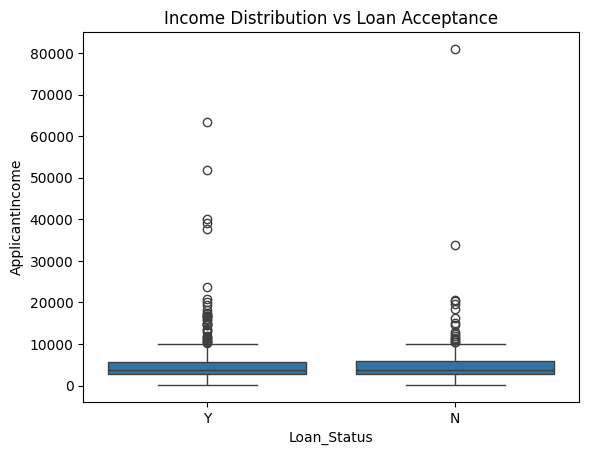

In [8]:
# Check income effect
sns.boxplot(data=df, x='Loan_Status', y='ApplicantIncome')
plt.title("Income Distribution vs Loan Acceptance")
plt.show()

<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

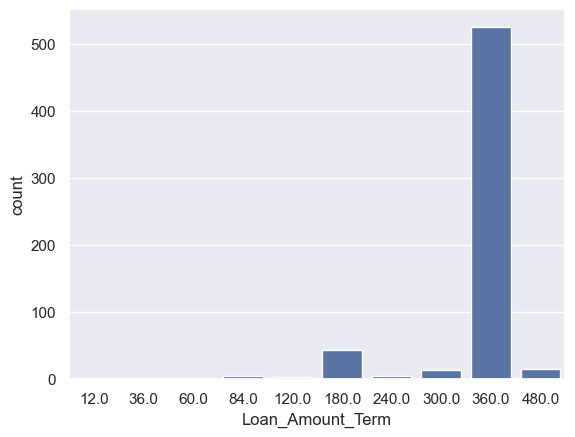

In [9]:
import seaborn as sns

# Set the Seaborn default theme and other settings
sns.set()

sns.countplot(x='Loan_Amount_Term',data=df)

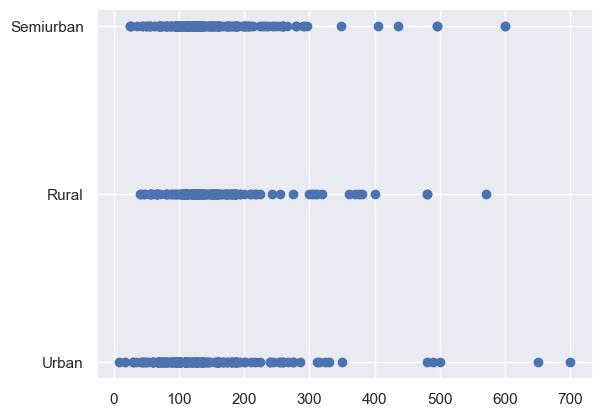

In [10]:
plt.scatter(df['LoanAmount'], df['Property_Area'])

In [11]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**Encoding and Scaling**

In [12]:
# Encode categorical columns
le = LabelEncoder()
cols_to_encode = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for col in cols_to_encode:
    df[col] = le.fit_transform(df[col])

# Separate features and target
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


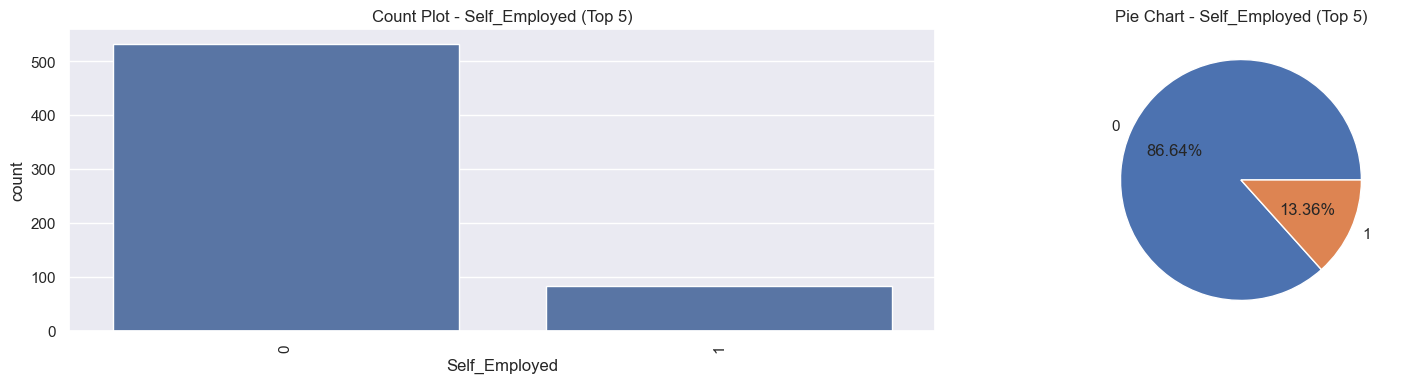

In [13]:
variable = 'Self_Employed'

# Get the top 5 values from the 'Metric tons of CO2e per capita (2018)
top_5_values = df[variable].value_counts().nlargest(5).index

df_top_5 = df[df[variable].isin(top_5_values)]

plt.figure(figsize=(17, 4))

plt.subplot(1, 2, 1)
sns.countplot(x=variable, data=df_top_5, order=top_5_values)
plt.title(f'Count Plot - {variable} (Top 5)')
plt.xticks(rotation=90)

# Pie chart
plt.subplot(1, 2, 2)
counts = df_top_5[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable} (Top 5)')

plt.tight_layout()

plt.show()

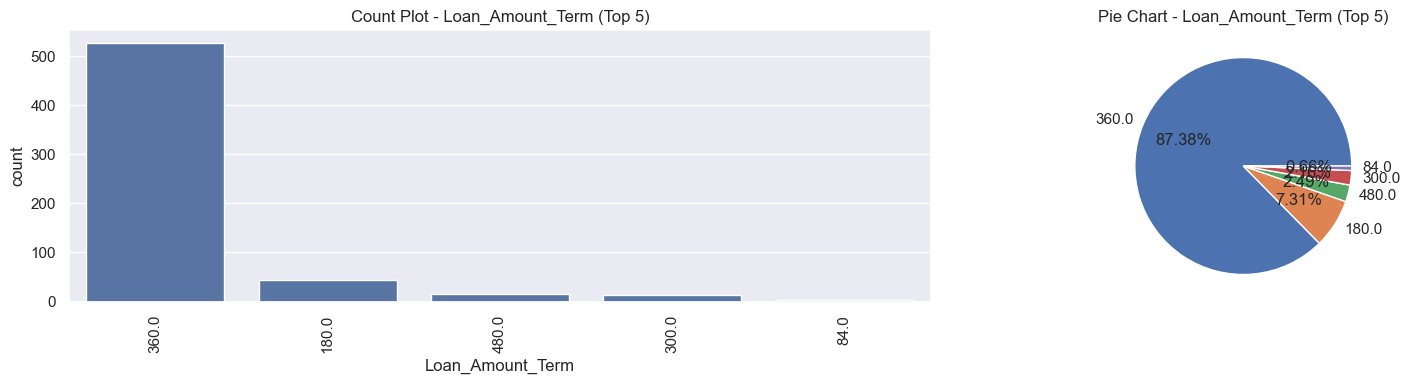

In [14]:
#Multi Variate Analysis
variable = 'Loan_Amount_Term'

# Get the top 5 values from the 'Metric tons of CO2e per capita (1990)
top_5_values = df[variable].value_counts().nlargest(5).index

df_top_5 = df[df[variable].isin(top_5_values)]

plt.figure(figsize=(17, 4))

plt.subplot(1, 2, 1)
sns.countplot(x=variable, data=df_top_5, order=top_5_values)
plt.title(f'Count Plot - {variable} (Top 5)')
plt.xticks(rotation=90)

# Pie chart
plt.subplot(1, 2, 2)
counts = df_top_5[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable} (Top 5)')

plt.tight_layout()

plt.show()

**Train Models**

In [15]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)


In [16]:
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)


In [17]:
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Logistic Regression
Accuracy: 0.7886178861788617
[[18 25]
 [ 1 79]]
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [18]:
print("Decision Tree Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))


Decision Tree Classifier
Accuracy: 0.7479674796747967
[[19 24]
 [ 7 73]]
              precision    recall  f1-score   support

           0       0.73      0.44      0.55        43
           1       0.75      0.91      0.82        80

    accuracy                           0.75       123
   macro avg       0.74      0.68      0.69       123
weighted avg       0.74      0.75      0.73       123



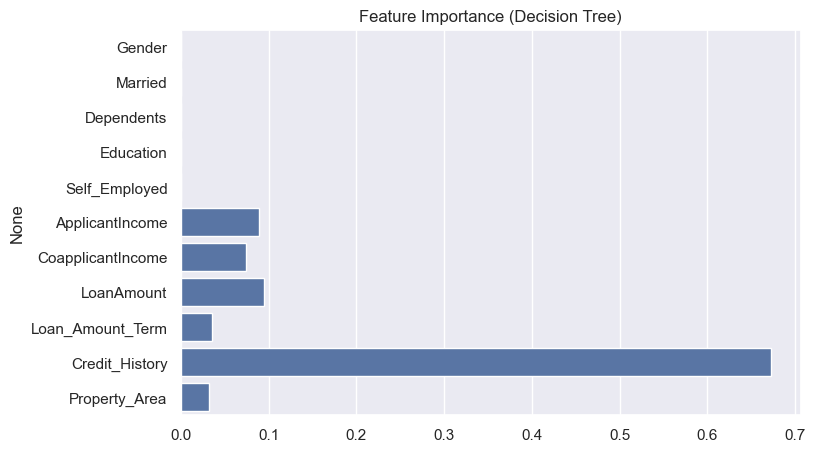

In [19]:
# Feature Importance from Decision Tree
features = df.drop("Loan_Status", axis=1).columns
importances = tree_model.feature_importances_

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance (Decision Tree)")
plt.show()


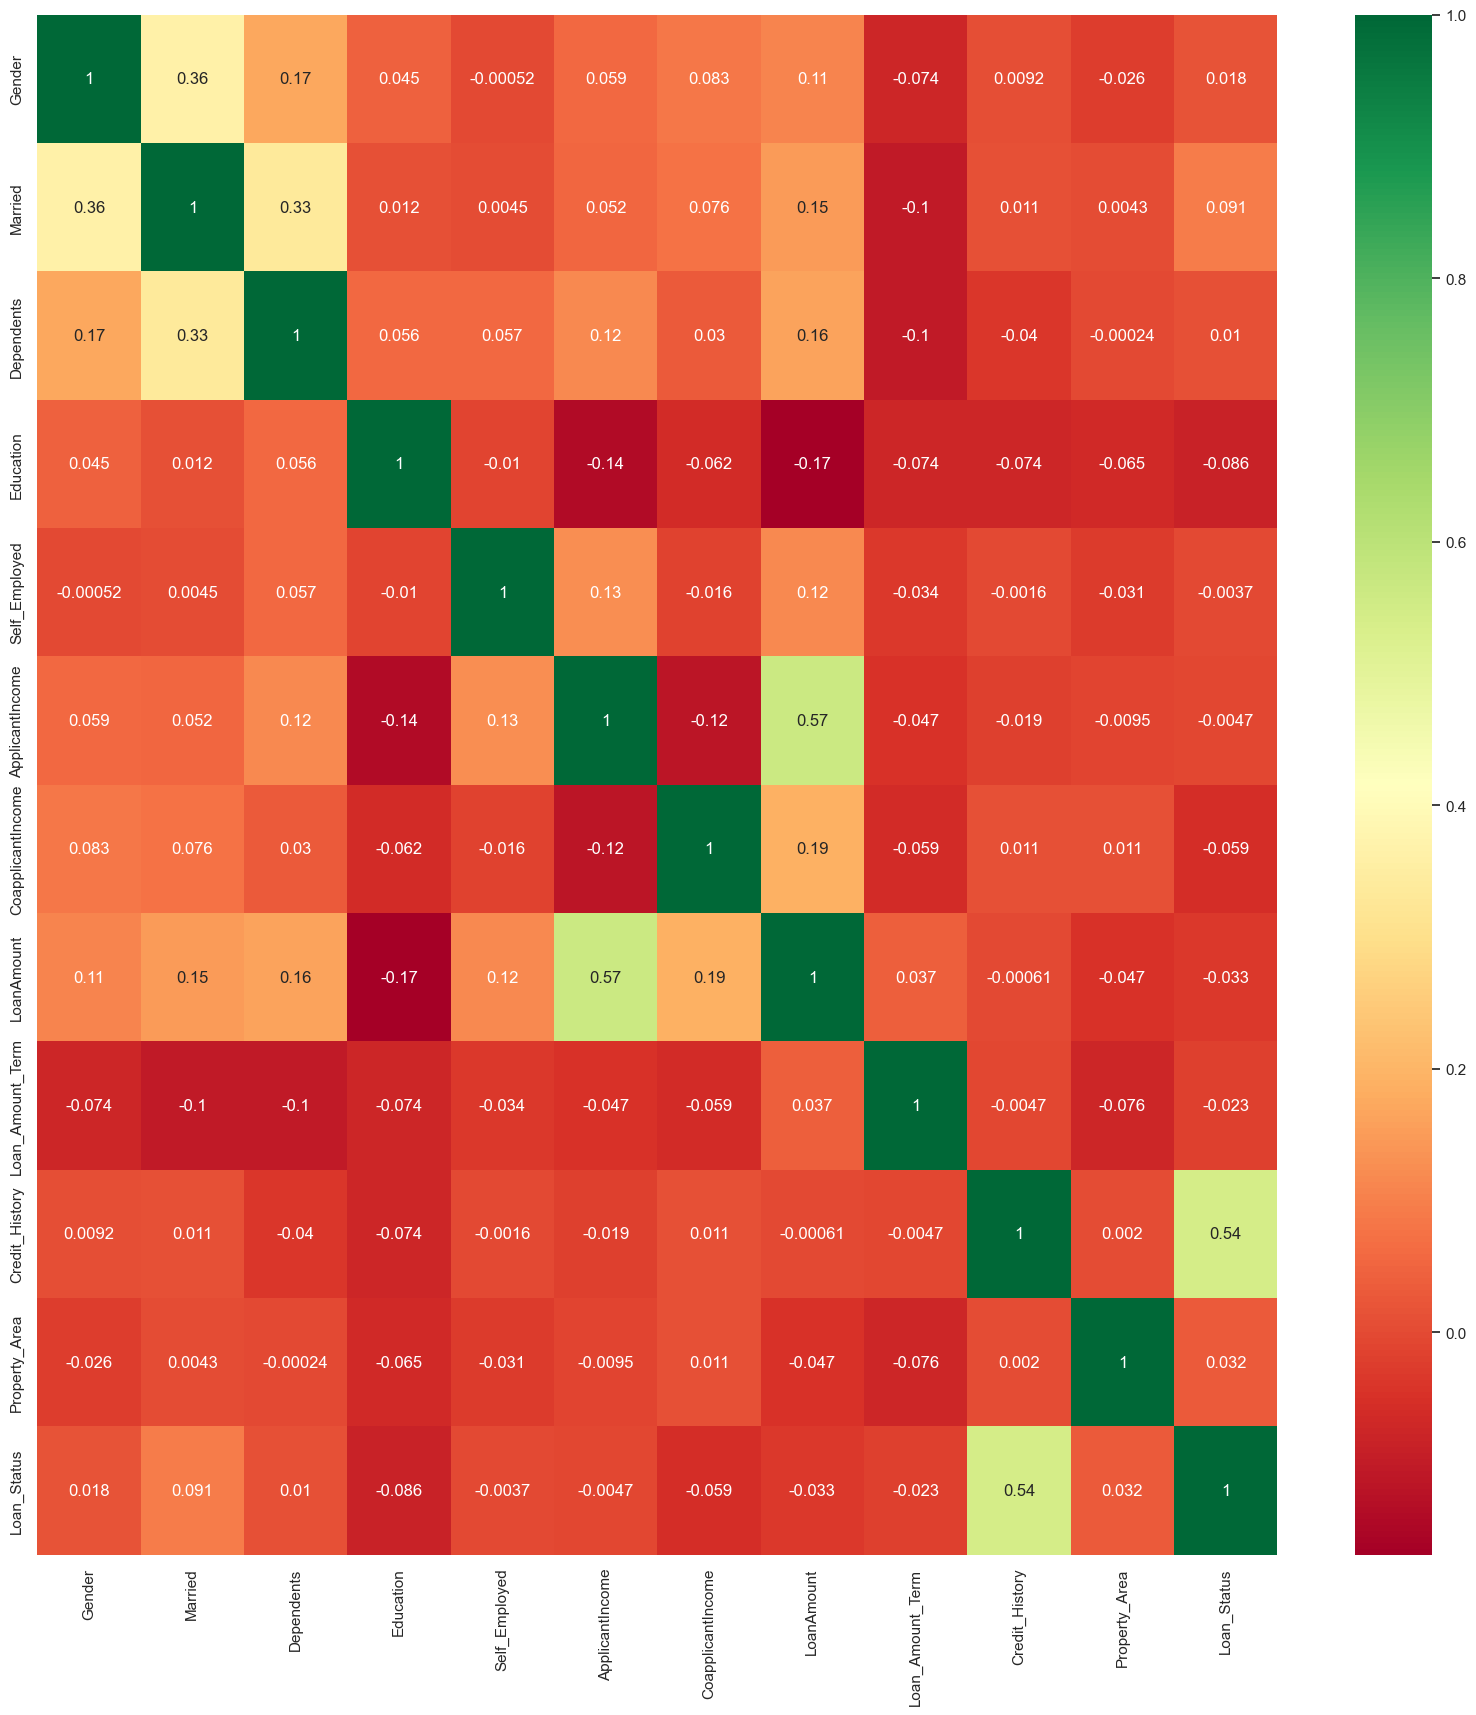

In [20]:
## Correlation
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

**Splitting Test & Train Models**

In [23]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [25]:
x= df[['Gender', 
     'ApplicantIncome', 
     'CoapplicantIncome', 
     'LoanAmount', 
     'Loan_Amount_Term', 
     'Credit_History', 
     'Property_Area']]
y=df['Loan_Status']

In [26]:
x


,Gender,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,5849,0.0,128.0,360.0,1.0,2
1,1,4583,1508.0,128.0,360.0,1.0,0
2,1,3000,0.0,66.0,360.0,1.0,2
3,1,2583,2358.0,120.0,360.0,1.0,2
4,1,6000,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...
609,0,2900,0.0,71.0,360.0,1.0,0
610,1,4106,0.0,40.0,180.0,1.0,0
611,1,8072,240.0,253.0,360.0,1.0,2
612,1,7583,0.0,187.0,360.0,1.0,2


In [27]:
y


0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [29]:
len(x_train)

491

In [30]:
len(x_test)

123

In [31]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [32]:
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [33]:
y_pred = clf.predict (x_test)

In [34]:
y_test

285    1
323    1
482    1
173    1
518    0
      ..
554    0
6      1
242    1
192    0
157    1
Name: Loan_Status, Length: 123, dtype: int64

In [35]:
#Accuracy
clf.score (x_test, y_test)

0.6910569105691057

**Evluation model performance MAE & RMSE**

In [36]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [37]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred, labels= clf.classes_)
print(cm)

[[17 19]
 [19 68]]


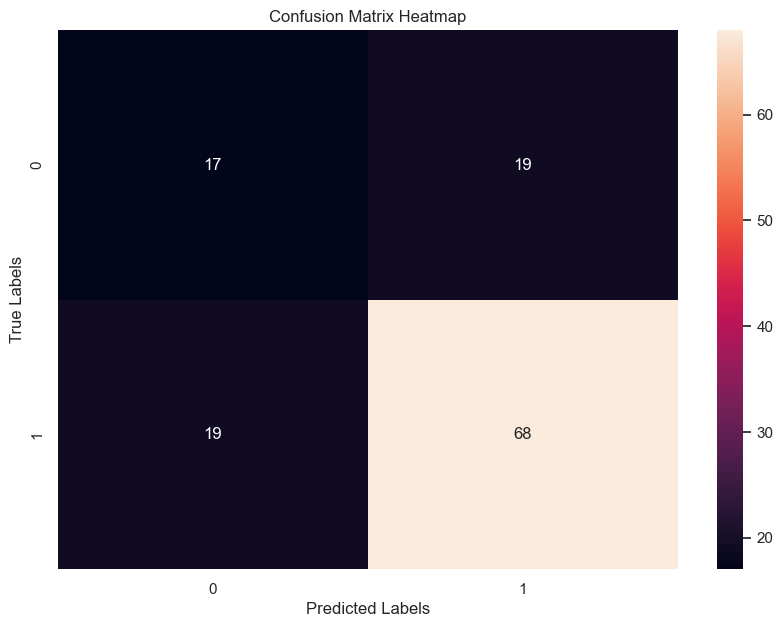

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))  # Set the figure size
sns.heatmap(cm, annot=True, fmt='g', xticklabels=clf.classes_, yticklabels=clf.classes_)  # Corrected yticks

plt.title('Confusion Matrix Heatmap')  
plt.xlabel('Predicted Labels')  
plt.ylabel('True Labels')  
plt.show() 

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.47      0.47        36
           1       0.78      0.78      0.78        87

    accuracy                           0.69       123
   macro avg       0.63      0.63      0.63       123
weighted avg       0.69      0.69      0.69       123



**Grid Search**

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier  

parameters = {'max_depth': [10, 5], 'max_features': ["sqrt", "log2"]}

tree = DecisionTreeClassifier()
clf = GridSearchCV(tree, parameters)
clf.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [10, 5],
                         'max_features': ['sqrt', 'log2']})

In [41]:
y_pred = clf.predict(X_test)  
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 0]


In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.08      0.03      0.04        36
           1       0.68      0.86      0.76        87

    accuracy                           0.62       123
   macro avg       0.38      0.44      0.40       123
weighted avg       0.50      0.62      0.55       123



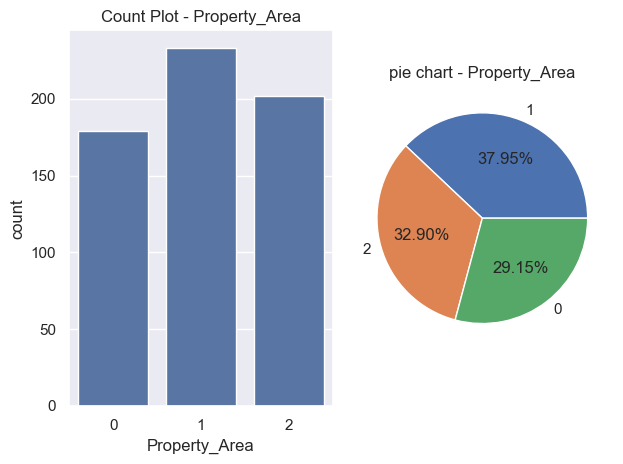

In [45]:
#Multi Variate Analysis Property_Area

variable = 'Property_Area'
plt.figure (figure = (6,5))

#count plot
plt.subplot(1,2,1)
sns.countplot(x=variable, data= df)
plt.title(f'Count Plot - {variable}')

#pie chart
plt.subplot(1,2,2)
counts=df[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'pie chart - {variable}')


plt.tight_layout()

plt.show()

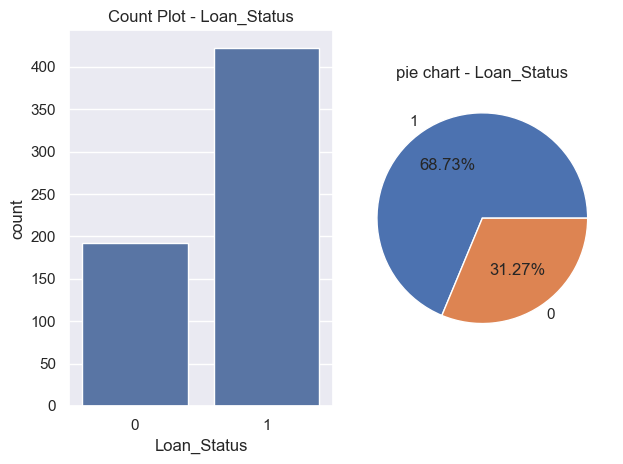

In [46]:
#UNI Variate Analysis Loan_Status

variable = 'Loan_Status'
plt.figure (figure = (6,5))

#count plot
plt.subplot(1,2,1)
sns.countplot(x=variable, data= df)
plt.title(f'Count Plot - {variable}')

#pie chart
plt.subplot(1,2,2)
counts=df[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'pie chart - {variable}')

plt.tight_layout()
plt.show()

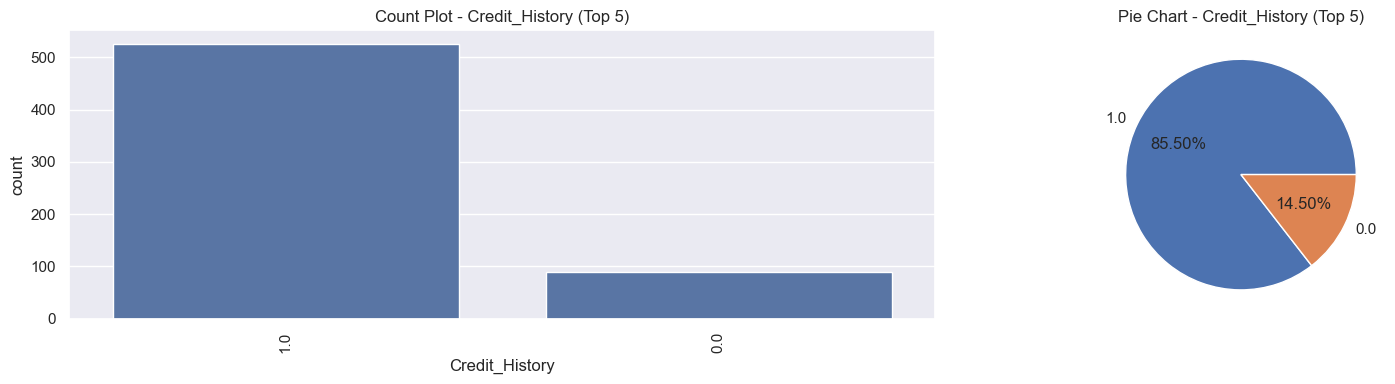

In [47]:
#Multi Variate Analysis Credit_History
variable = 'Credit_History'

# Get the top 5 values from the 'Metric tons of CO2e per capita (1990)
top_5_values = df[variable].value_counts().nlargest(5).index

df_top_5 = df[df[variable].isin(top_5_values)]

plt.figure(figsize=(17, 4))

plt.subplot(1, 2, 1)
sns.countplot(x=variable, data=df_top_5, order=top_5_values)
plt.title(f'Count Plot - {variable} (Top 5)')
plt.xticks(rotation=90)

# Pie chart
plt.subplot(1, 2, 2)
counts = df_top_5[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable} (Top 5)')

plt.tight_layout()

plt.show()

In [43]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


Data VISUALISATION

In [48]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [50]:
ct_conversion_test_group= pd.crosstab(df['Property_Area'], df['LoanAmount'], normalize= 'index')
ct_conversion_test_group

LoanAmount,9.0,17.0,25.0,26.0,30.0,35.0,36.0,40.0,42.0,44.0,...,436.0,480.0,490.0,495.0,496.0,500.0,570.0,600.0,650.0,700.0
Property_Area,,,,,,,,,,,,,,,,,,,,,
0,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.005587,0.005587,0.000000,...,0.000000,0.011173,0.00000,0.000000,0.000000,0.00000,0.005587,0.000000,0.00000,0.00000
1,0.00000,0.00000,0.008584,0.004292,0.000000,0.00000,0.004292,0.000000,0.000000,0.004292,...,0.004292,0.000000,0.00000,0.004292,0.004292,0.00000,0.000000,0.008584,0.00000,0.00000
2,0.00495,0.00495,0.000000,0.000000,0.009901,0.00495,0.000000,0.004950,0.000000,0.004950,...,0.000000,0.004950,0.00495,0.000000,0.000000,0.00495,0.000000,0.000000,0.00495,0.00495


In [51]:
ct_conversion_test_group= pd.crosstab(df['CoapplicantIncome'], df['ApplicantIncome'], normalize= 'index')
ct_conversion_test_group

ApplicantIncome,150,210,416,645,674,1000,1025,1299,1378,1442,...,20667,20833,23803,33846,37719,39147,39999,51763,63337,81000
CoapplicantIncome,,,,,,,,,,,,,,,,,,,,,
0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003663,...,0.003663,0.0,0.003663,0.003663,0.003663,0.0,0.003663,0.003663,0.003663,0.003663
16.120001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
189.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
240.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
242.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10968.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
11300.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
20000.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
